# Week 9: Cloud-Hosted Notebook Data Manipulation
 Author: Tianji Rao

## Ingest
Here, the author used the [`Eletric_Vehicle_Population_Data.csv`](https://catalog.data.gov/dataset/electric-vehicle-population-data) as the sample dataset and performed a series of descriptive statistics. Here we can have a glance at the dataset. All customized functions are from `lib`, which contains functions that can be used for statistical description and visualization.

In [1]:
import pandas as pd
# import polars as pl
from lib import pd_desc, mean, median, std, pd_visual

In [2]:
# Using pandas to read .csv file
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
# print data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

Last five rows

In [4]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48.0,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43.0,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
143595,7SAXCDE55N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,220266560,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10


What are the columns?

In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

What is the shape: i.e. rows and columns

In [6]:
df.shape

(143596, 17)

## EDA

What are general characteristics of the data? A good way to find out is df.describe

In [8]:
#NBVAL_CHECK_OUTPUT
pd_desc(df)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,143574.000000,143596.000000,143596.000000,143596.000000,143269.000000,1.435960e+05,1.435740e+05
mean,98175.212824,2019.865574,70.495738,1373.386515,29.371748,2.092015e+08,5.297590e+10
std,2383.169088,3.016004,97.128735,9450.067747,14.823899,8.353700e+07,1.594040e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668338e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111039e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364520e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [8]:
#NBVAL_CHECK_OUTPUT
mean(df['Electric Range'])

70.49573804284242

In [9]:
#NBVAL_CHECK_OUTPUT
median(df['Model Year'])

2021.0

In [10]:
#NBVAL_CHECK_OUTPUT
round(std(df['Electric Range']), 6)

97.128735

### Model Year Analysis
By visualization

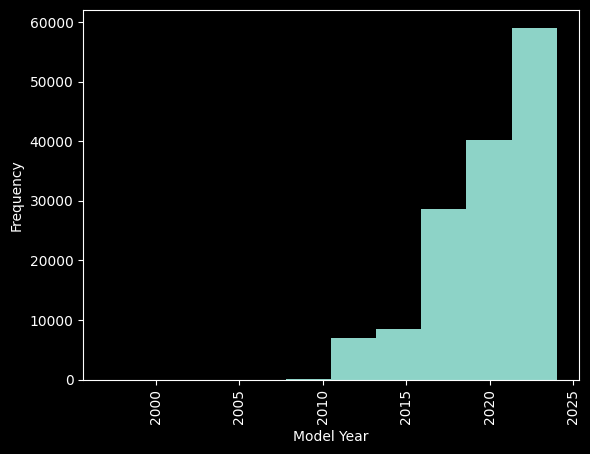

In [9]:
pd_visual(df['Model Year'])

### Electric Range Analysis
By visualization

In [13]:
pd_desc(df['Electric Range'])

count    143596.000000
mean         70.495738
std          97.128735
min           0.000000
25%           0.000000
50%          19.000000
75%         111.000000
max         337.000000
Name: Electric Range, dtype: float64

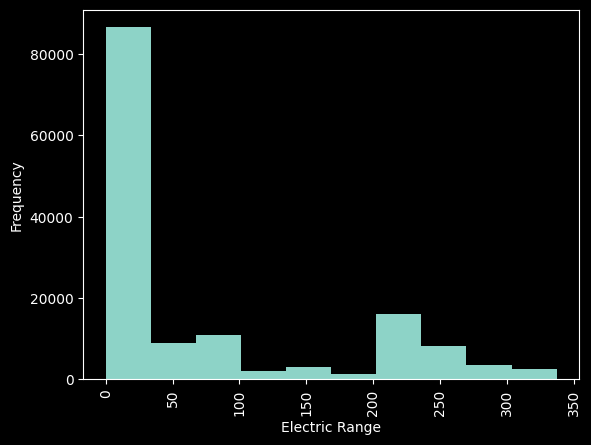

In [12]:
pd_visual(df['Electric Range'])

## Modeling

## Conclusion

### 